In [5]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt
import pickle
import random

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [6]:
print('l')

l


In [7]:
dir = '/Users/Hutch/Desktop/data_subsets/dz100'


In [8]:
categories = ['depuy','zimmer']

In [9]:
data = []
print(1)

1


In [10]:


for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        implant_img = cv2.imread(imgpath,0)
        
        try:
            cv2.resize(implant_img,(200,200))
            image = np.array(implant_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
print(len(data))

     
       

199


##### 

In [11]:
print(type(data))


<class 'list'>


In [12]:
#pick_in = open('datadz50.pickle','wb')
#pickle.dump(data,pick_in)
#pick_in.close
   

In [13]:
#pick_in = open('datadz50.pickle','rb')
#data = pickle.load(pick_in)
#pick_in.close


In [14]:
random.shuffle(data)
features = []
labels = []

In [15]:
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25)

In [17]:
X_train = np.asarray(xtrain,dtype=object)
X_train.shape

(149, 62500)

In [18]:
type(ytrain)

list

In [19]:
X_test = np.asarray(xtest)
X_test.shape

(50, 62500)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
model = SVC(C=1,kernel='poly',gamma = 'auto')

In [21]:
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#pick = open('model.sav','wb')
#pickle.dump(model,pick)
#pick.close

In [ ]:
#pick = open('model.sav','rb')
#model = pickle.load(pick)
#pick.close

In [22]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

In [23]:
# non-linear model           NONLINEAR     RADIAL BIAS FUNCTION
# using rbf kernel, C=1, default value of gamma

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=ytest, y_pred=prediction), "\n")

# cm
print(metrics.confusion_matrix(y_true=ytest, y_pred=prediction))

accuracy: 0.56 

[[20 11]
 [11  8]]


In [24]:
print('Accuracy: ', accuracy)
print('Prediction is: ',categories[prediction[0]])

Accuracy:  0.56
Prediction is:  depuy


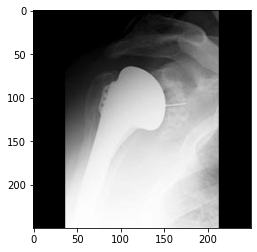

In [25]:
myimplant = xtest[0].reshape(250,250)
plt.imshow(myimplant,cmap = 'gray')
plt.show()


https://www.youtube.com/watch?v=0rjlviOQlbc

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [27]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(xtrain, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.238353,0.069103,0.256090,0.038463,5,0.01,"{'C': 5, 'gamma': 0.01}",0.466667,0.6,0.633333,...,0.597701,0.067849,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.307202,0.074941,0.262307,0.018856,5,0.001,"{'C': 5, 'gamma': 0.001}",0.466667,0.6,0.633333,...,0.597701,0.067849,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.281337,0.047368,0.260365,0.011570,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.466667,0.6,0.633333,...,0.597701,0.067849,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.266855,0.029350,0.264211,0.017043,10,0.01,"{'C': 10, 'gamma': 0.01}",0.466667,0.6,0.633333,...,0.597701,0.067849,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.271725,0.029445,0.265213,0.018099,10,0.001,"{'C': 10, 'gamma': 0.001}",0.466667,0.6,0.633333,...,0.597701,0.067849,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.311048,0.061779,0.284248,0.042513,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.466667,0.6,0.633333,...,0.597701,0.067849,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


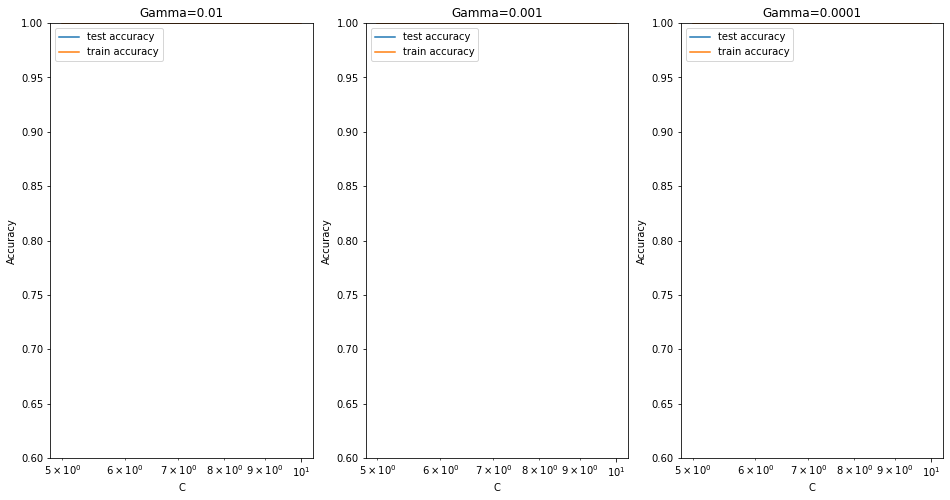

In [29]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [30]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.5977011494252873 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


In [31]:
# model with optimal hyperparameters

# model2
model2 = SVC(C=5, gamma=.01, kernel="poly")

model2.fit(xtrain, ytrain)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:

prediction2 = model2.predict(xtest)

# metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=ytest, y_pred=prediction2), "\n")

# cm
print(metrics.confusion_matrix(y_true=ytest, y_pred=prediction2))

accuracy: 0.56 

[[20 11]
 [11  8]]
